In [1]:
# data preprocess
from keras.datasets import mnist
import numpy as np

(train_features, _), (test_features, _) = mnist.load_data()  # labels is not used in autoencoder model
train_features = train_features / 255  # normalize values between 0 ~ 1
test_features = test_features / 255
train_features = train_features.reshape((train_features.shape[0], -1))  # reshape to new shape(data_length, 784)
test_features = test_features.reshape((test_features.shape[0], -1))
print(train_features.shape)
print(test_features.shape)

Using TensorFlow backend.


(60000, 784)
(10000, 784)


In [2]:
# build the simplest autoencoder model
from keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model

# construct the autoencoder model
encoding_dim = 32  # compress 784 dim into 32 dim
input_img = Input(shape=(784, ))  # 784 dim input placeholder
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5)  # add L1 regularizer to avoid overfiting
                )(input_img)  # encoder layer
decoded = Dense(784, activation='sigmoid')(encoded)  # decoder layer
autoencoder = Model(inputs=input_img, outputs=decoded)

# construct the encoder model
encoder = Model(inputs=input_img, outputs=encoded)

# construct the decoder model
decoded_input = Input(shape=(encoding_dim, ))  # 32 dim imput placeholder
decoder_layer = autoencoder.layers[-1]  # retrieve the last layer of the autoencoder model
decoder = Model(inputs=decoded_input, outputs=decoder_layer(decoded_input))

# define optimizer and loss
autoencoder.compile(optimizer='adadelta',
                    loss='binary_crossentropy')

In [3]:
# train autoencoder model
autoencoder.fit(x=train_features,
                y=train_features,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(test_features, test_features))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 64us/step - loss: 0.6857 - val_loss: 0.6607
Epoch 2/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.6440 - val_loss: 0.6272
Epoch 3/100
60000/60000 [==============================] - 4s 58us/step - loss: 0.6111 - val_loss: 0.5952
Epoch 4/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.5802 - val_loss: 0.5655
Epoch 5/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.5518 - val_loss: 0.5386
Epoch 6/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.5263 - val_loss: 0.5146
Epoch 7/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.5036 - val_loss: 0.4932
Epoch 8/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.4835 - val_loss: 0.4744
Epoch 9/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.4658 - val_loss: 0.4

60000/60000 [==============================] - 4s 69us/step - loss: 0.2830 - val_loss: 0.2829
Epoch 78/100
60000/60000 [==============================] - 4s 68us/step - loss: 0.2827 - val_loss: 0.2826
Epoch 79/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.2824 - val_loss: 0.2823
Epoch 80/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2821 - val_loss: 0.2820
Epoch 81/100
60000/60000 [==============================] - 3s 55us/step - loss: 0.2818 - val_loss: 0.2817
Epoch 82/100
60000/60000 [==============================] - 4s 60us/step - loss: 0.2815 - val_loss: 0.2814
Epoch 83/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.2813 - val_loss: 0.2811
Epoch 84/100
60000/60000 [==============================] - 3s 56us/step - loss: 0.2810 - val_loss: 0.2808
Epoch 85/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.2807 - val_loss: 0.2806
Epoch 86/100
60000/60000 [========================

In [4]:
# using test images to encode and decode some digits  
encoded_imgs = encoder.predict(test_features)
decoded_imgs = decoder.predict(encoded_imgs)

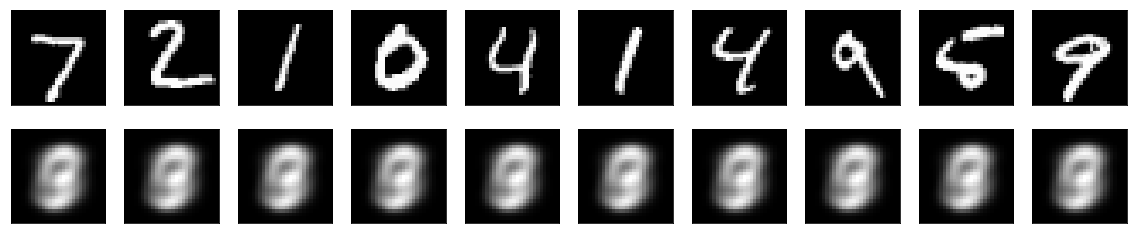

In [5]:
# visualize the reconstructed digits
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original digits
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_features[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstructed digits
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()